# Drink By Data
### by Nima Sayyah

![nswine.png](nswine.png)


## Table of Contents
- [Introduction](#intro)
- [Exploratory Data Analysis](#eda)
- [Outcomes](#conclusions)

<a id='intro'></a>
## Introduction

For this project I implemented CRISP-DM Process over Wine Rating dataset extracted from Kaggle. The process consists of:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results
6. Deploy

## Business Understanding

There are many varieties of wines in the market. It may sometimes turn into a dilemma if you are a wine lover but don't have expert knowledge that helps you selecting the best wine for the best value. I always stick to a random selection without reasonably justifying my choice but merely the value. I understand having a slightly more insight could help me picking a better choice. However, what could contribute into this difficult decision making is the situation for which we have to make a selection. Is the wine for a quiet night personal use? Is it for a party? Is it a present?. There are a few questions that can be asked attempting to resolve the dilemma.

- Where the best wines originate?
- Is there a correlation between the quality and price?
- Which certain wine varieties considered having a better quality?
- What is the best wine in each price range? 
- What words are most used when describing wine?

<a id='eda'></a>
## Exploratory Data Analysis

In [4]:
# importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
%matplotlib inline

In [5]:
# read the data
df = pd.read_csv("winemag-data-130k-v2.csv")

In [6]:
# explore the dataframe 
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### Data Observation

The data shows it contains 129971 rows and 14 columns: 

`df` columns:
 - **unnamed:** Index column that is uneeded
 - **country:** Countries where the wines produced
 - **description:** Description of the wines
 - **designation:** Plantations of grapevines from which wines are produced
 - **points:** Number of points scored for each wine 
 - **price:** The price of the bottle of wine
 - **province:** The province where the wines produced 
 - **region_1:** The region where the wines produced
 - **region_2:** More specific regions where the wines produced
 - **taster_name:** The name of the reviwer
 - **taster_twitter_handle:** The Twitter account of the reviewer
 - **title:** The name and year of the reviewed Wine 
 - **variety:** The type of grapes used to produce the wine
 - **winery:** The winery where the wines were produced

In [7]:
# uderstand the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [25]:
# check for duplicate rows
df.duplicated().sum()

0

At this stage it is important to understand what columns are the least required to proceed our analysis with. These are the columns which will not add usefull information.

- **Unnamed** is an index column which can be removed. 
- **region_2** is redundant as region_1 will suffice.
- **taster_name** contains unimportant information.
- **taster_twitter_handle** contains unimportant information. 
- **designation** contains unimportant information.

It is also clear from the description that there are considrable null or missing values in certain columns:

- **country**
- **price**
- **province**
- **variety**
- **region_1**

In [8]:
# making a copy to safely change the dataframe
df1 = df.copy()

In [9]:
# drop the unneeded columns
df1 = df1.drop(['Unnamed: 0','region_2', 'taster_name', 'taster_twitter_handle', 'designation'], axis=1)

In [10]:
#explore a glimps of the new dataframe
df1.head()

,country,description,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [11]:
#generating descriptive statistic 
df1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


The above descriptive analysis demonstrates the given range of scores given to the wines. These ratings are also used on various platforms by wine fans:

 - 98–100 – Classic
 - 94–97 – Superb
 - 90–93 – Excellent
 - 87–89 – Very good
 - 83–86 – Good
 - 80–82 – Acceptable
 
We can also draw the inference that the price of wines are in dollars based on www.winemag.com. Therefore the min and max scores of **80** and **100** are given to min price of **\\$4** and max of **\\$3300** respectively.

In [12]:
# the number of reviews for each country
df1.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

Unsurprisingly, the most wine reviewes are from countries with high reputation in wine production: **USA**, **France**, **Italy**, **Spain** 

In [15]:
# the number of each unique grape type(variety)
df1.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Merseguera-Sauvignon Blanc        1
Sideritis                         1
Prunelard                         1
Tinta Amarela                     1
Tinto Velasco                     1
Name: variety, Length: 707, dtype: int64

In [16]:
# reassess the datatypes and null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   region_1     108724 non-null  object 
 6   title        129971 non-null  object 
 7   variety      129970 non-null  object 
 8   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 8.9+ MB


In [28]:
# price proportion of the data
price_prop = df1.price.count()/df1.shape[0]
price_prop

0.9307845596325334

In [29]:
# region_1 proportion of data 
reg1_prop = df1.region_1.count()/df1.shape[0]
reg1_prop

0.8365250709773718

In [32]:
# calulating missing values
reg1_miss_val=  129971 - 108724
reg1_miss_val

21247

In [33]:
# calulating missing values
price_miss_val=  129971 - 120975
price_miss_val

8996

The above information indicates that **region_1** contains the highest missing values comparatively. Removing its missing values may not be advised at this stage. However, we will drop the rest of the columns wit missing values.

In [34]:
# dropping the rows of columns with missing values except region_1
df1 = df1.dropna(how='any', subset=['country', 'price', 'province','variety', ])

In [37]:
# testing the data after the drops
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   region_1     101400 non-null  object 
 6   title        120915 non-null  object 
 7   variety      120915 non-null  object 
 8   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ MB


The **title** column in the dataframe seem to contain years which can be extracted. 

In [39]:
# creating a new column: year
df1['year'] = df1['title'].str.extract('(\d+)')

In [40]:
# testing a glimps of the dataframe 
df1.head()

,country,description,points,price,province,region_1,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


In [42]:
# Datafram new columns and rows test
df1.shape

(120915, 10)

### Exploratory Data Analysis: Data Analysis and Visualisation

#### 1. Where the best wines originate?

To answer this question it is a good idea to plot the distributions of the points.

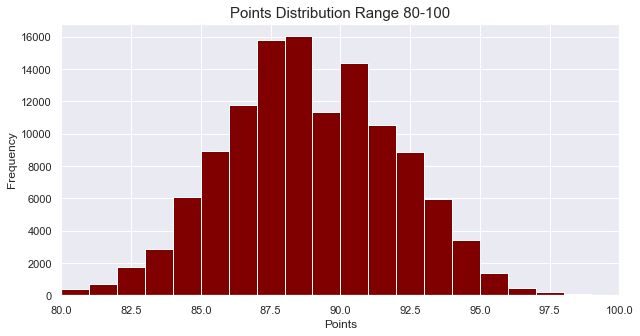

In [69]:
# Plot the distribution of points
plt.figure(figsize=(10,5))
bin_edges = np.arange (80, df1['points'].max()+1, 1)
plt.hist(data = df1, x = 'points', bins = bin_edges, color = 'maroon')
plt.xlim(80,100)
plt.xlabel('Points')
plt.ylabel('Frequency');
plt.title('Points Distribution Range 80-100', fontsize = 15);

The plot shows a rough normal distribution between the rage 80-100.

In [62]:
# Extracting highest 5 wine producing countries
country_top = df1.country.value_counts()[:5]
country_top

US          54265
France      17776
Italy       16914
Spain        6573
Portugal     4875
Name: country, dtype: int64

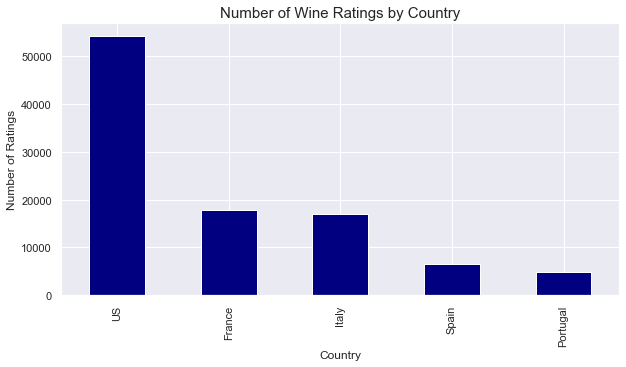

In [73]:
# Top 5 wine producing countries 
plt.figure(figsize=(10,5))
country_top.plot(kind='bar', color = 'navy')
plt.title('Number of Wine Ratings by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

It is apparent that the top 5 wine producing countries are: **USA**, **France**, **Italy**, **Spain**, **Portugal**

In [74]:
# Grouping countries by their average points
df_group = df1.groupby('country').agg('mean')

In [75]:
# A dataframe of countries with the 5 most points 
df_top_points = df_group.sort_values(by='points', ascending=False)[:5]
df_top_points

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


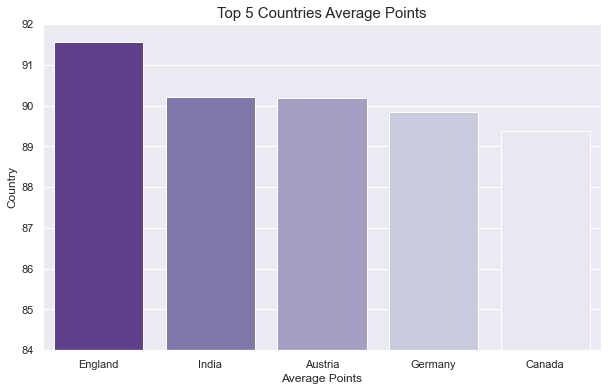

In [208]:
plt.figure(figsize=(10,6))
plt.ylim(84, 92)
sns.barplot(x=df_top_points.index, y=df_top_points['points'], palette='Purples_r')
plt.title('Top 5 Countries Average Points', fontsize = 15)
plt.xlabel('Average Points')
plt.ylabel('Country');

In [112]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.plot(kind='bar', df_top_points.index, df_top_points['points'],color = 'red')
plt.title('Number of Wine Ratings by Country', fontsize = 15)
plt.xlabel('Country')
plt.ylabel('Number of Ratings');

SyntaxError: positional argument follows keyword argument (<ipython-input-112-4d17daf29648>, line 2)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


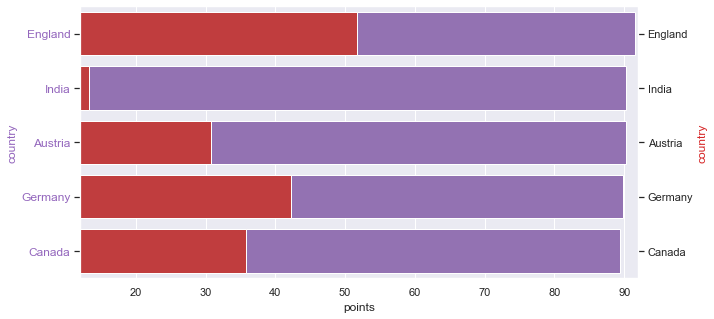

In [228]:

fig, ax1 = plt.subplots(figsize = (10,5))
color = 'tab:purple'
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Average Ratings', color=color, fontsize=12)


sns.barplot(df_top_points['points'],df_top_points.index, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize = 12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.xlim(12, 92)
color = 'tab:red'
ax2.set_ylabel('Price', color=color, fontsize=12)  # we already handled the x-label with ax1
sns.barplot(df_top_points['price'],df_top_points.index,color=color)
ax2.tick_params(axis='x', labelcolor=color, labelsize = 12)

In [141]:
#dftest=pd.DataFrame(df_top_points,columns=["points","price"])
df_top_points.plot(x=df_top_points, y=["points","price"], kind="bar",figsize=(9,8))
plt.show()

ValueError: Boolean array expected for the condition, not float64